Affine coordinate space has parrallel lines eg. cartesian coordinate space

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
from scipy.ndimage import measurements
import matplotlib.cm as cm

Image moments by $$M_{ij} = \Sigma_x \Sigma_y x^{i} y^{j} f(x,y)$$
Centroid $$\bar{x} = M_{10}/M_{00}, \bar{y} = M_{01}/M_{00}$$

Central moments = $$ \Sigma_x \Sigma_y (x-\bar{x})^{i} (y-\bar{y})^{j} f(x,y) $$

In [97]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in degrees between vectors 'v1' and 'v2' """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

((-4, 4), (-4, -4))


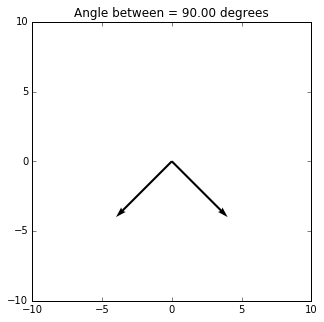

In [53]:
soa =np.array( [ [0,0,-4,-4], [0,0,4,-4]]) 
X,Y,U,V = zip(*soa)
print(U,V)
fig = plt.figure()
fig.set_size_inches(5, 5)

ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
angle = angle_between(U,V)
plt.title("Angle between = {0:.2f} degrees".format(angle))
plt.draw()
plt.show()

In [181]:
def getRedYellow(r):
    notRedOrYellow = (r[:,:,0] < 150) & (r[:,:,1] < 150) | (r[:,:,2] > 100)
    r[notRedOrYellow] = 0
    return r

def getImgMoments(im,channel):
    img = im.copy()
    h,w,c = img.shape
    print("h/w/c = {0}".format(tuple((h,w,c))))
    c = img[:,:,channel]
    x,y = np.arange(w), np.arange(h)
    X,Y = np.meshgrid(x,y)

    m00 = (c).sum()
    m10 = (c*X).sum()
    m01 = (c*Y).sum()
    xBar = (m10/m00).astype(np.uint32)
    yBar = (m01/m00).astype(np.uint32)
    centroid = np.array([xBar,yBar])

    m20 = (c*(X**2)).sum()
    m02 = (c*(Y**2)).sum()
    m11 = (c*Y*X).sum()

    mu20 = m20/m00 - xBar**2
    mu02 = m02/m00 - yBar**2
    mu11 = m11/m00 - xBar*yBar
    cov = np.array([[mu20,mu11],[mu11,mu02]])

    #print("Eigenvectors",e1,e2)
    return centroid, cov

In [201]:
def getEigenVectors(centroid1,centroid2,cov):
    
    eigenVals, eigenVectors = np.linalg.eig(cov)
    idx = abs(eigenVals).argsort()[::-1] #Order eigen-system
    eigenVals = eigenVals[idx]
    eigenVectors = eigenVectors[:,idx]

    e1 = eigenVectors[:,0]
    e2 = eigenVectors[:,1]
    
    redGreenDirection = centroid1.astype(np.float32)-centroid2.astype(np.float32)
    angleBetween = angle_between(redGreenDirection,e1)
    if angleBetween < 90: #If (centroid of green - centroid of red) (dotProd) first eigenvector then flip direction 
        e1*=-1
    if np.linalg.det(eigenVectors)<0: #Make sure determinant==1 so not mirror imaging
        e2*=-1
        
    evs = np.array([e1,e2])
    return evs

def getRotationMatrix(evs,centroid,scale= 1.0):
    angle = np.degrees(np.arctan2(evs[1][0],evs[0][0]))
    centroid = totuple(centroid)
    M = cv2.getRotationMatrix2D(centroid,-angle,1)
    print("To be rotated by {0:.2f} about {1}".format(angle,centroid))
    return M

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 59.94 about (1403, 1282)


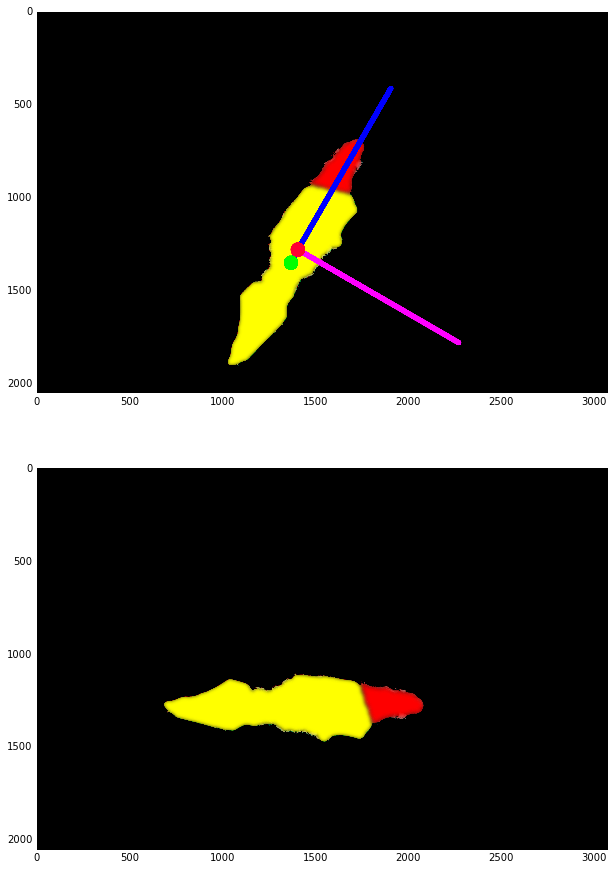

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 84.38 about (1384, 911)


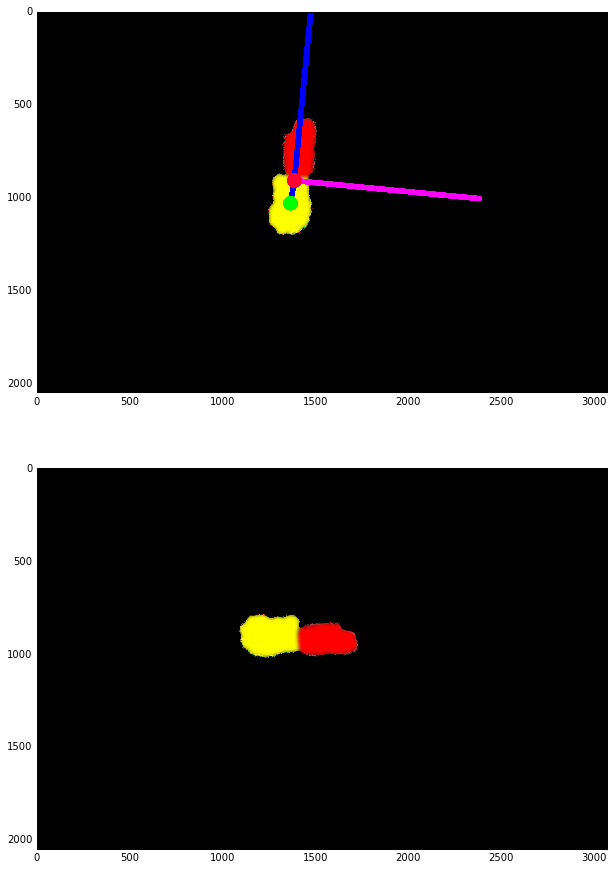

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 142.41 about (1684, 1003)


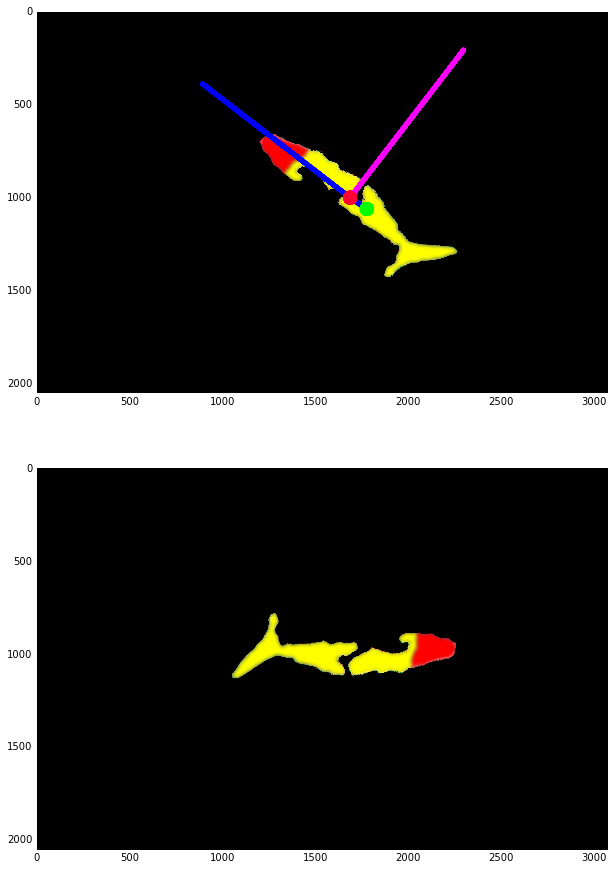

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 141.44 about (1118, 540)


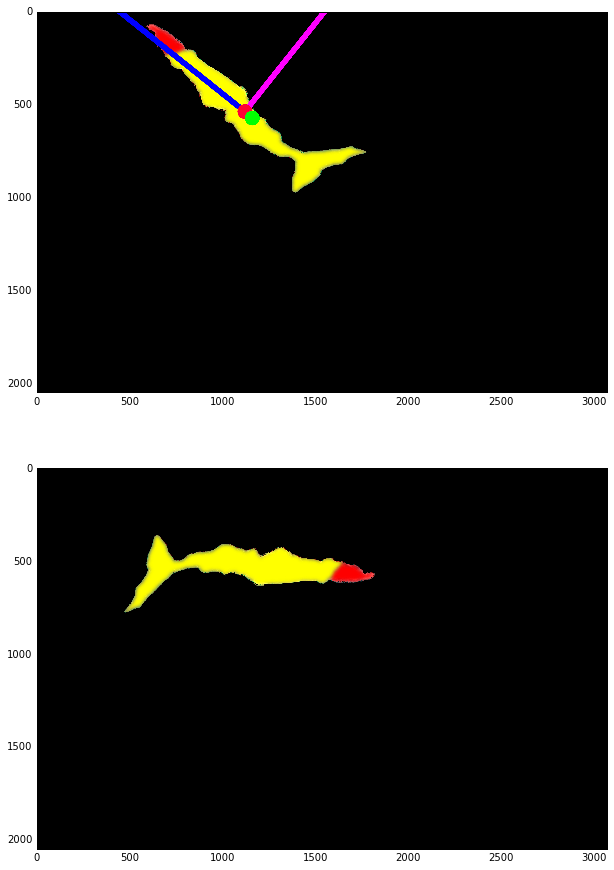

h/w/c = (1648, 2464, 3)
h/w/c = (1648, 2464, 3)
To be rotated by -108.67 about (1346, 291)


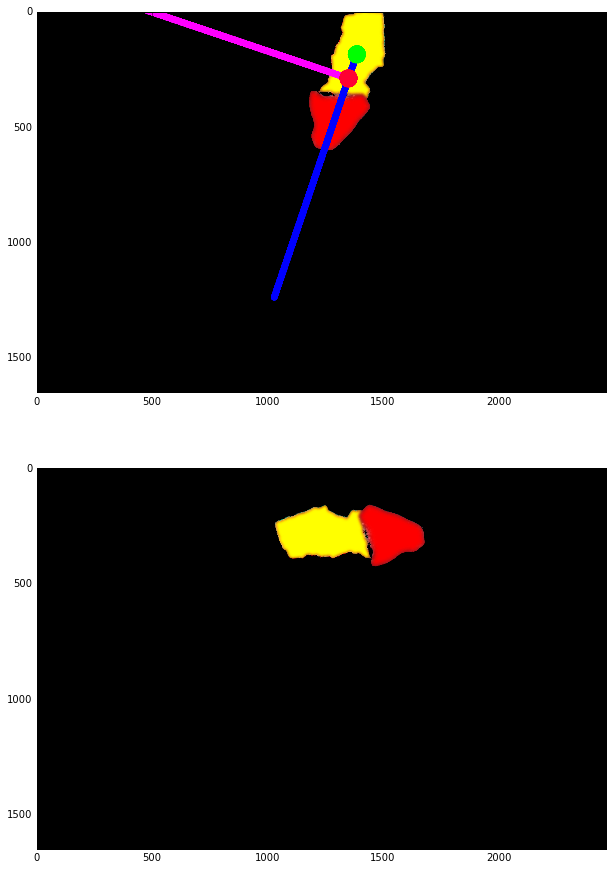

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 152.54 about (1466, 1278)


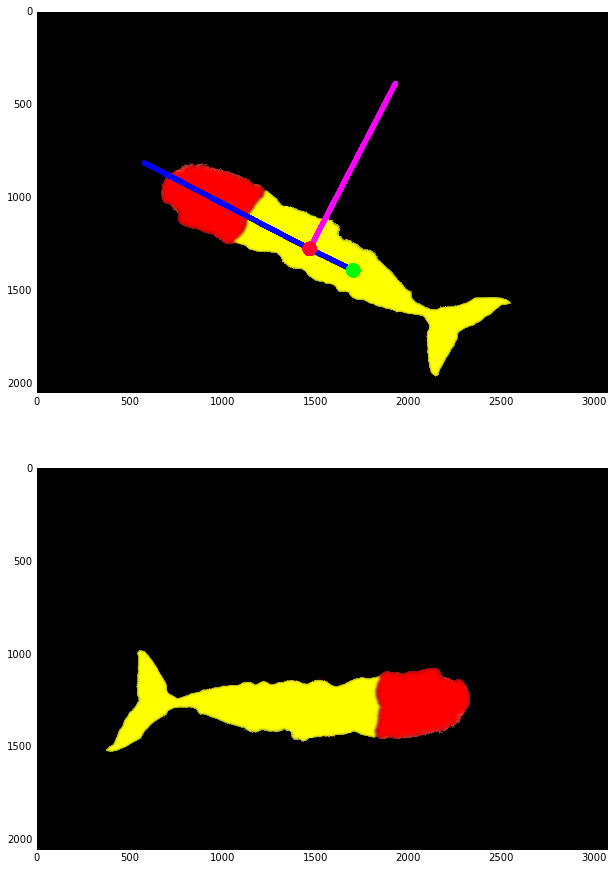

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by -10.57 about (1778, 895)


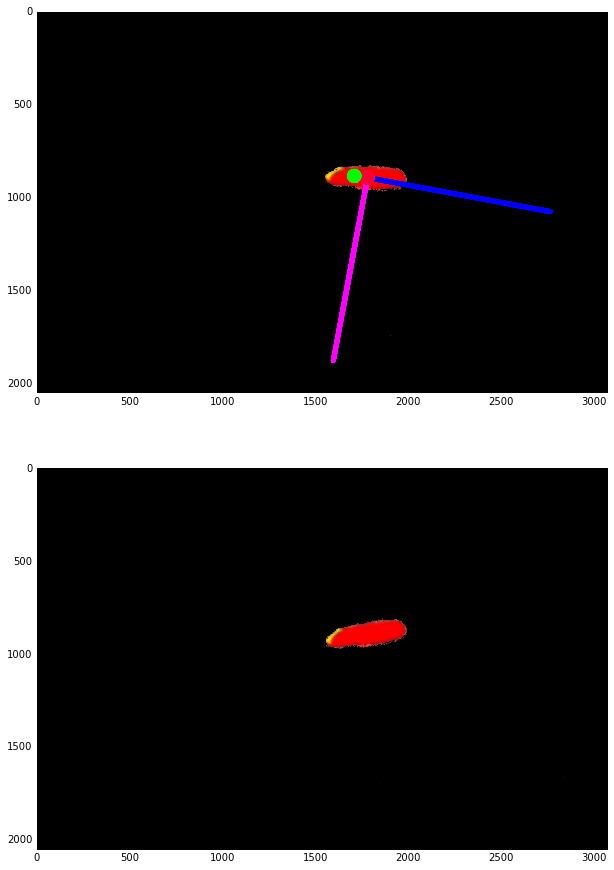

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 6.01 about (1241, 1138)


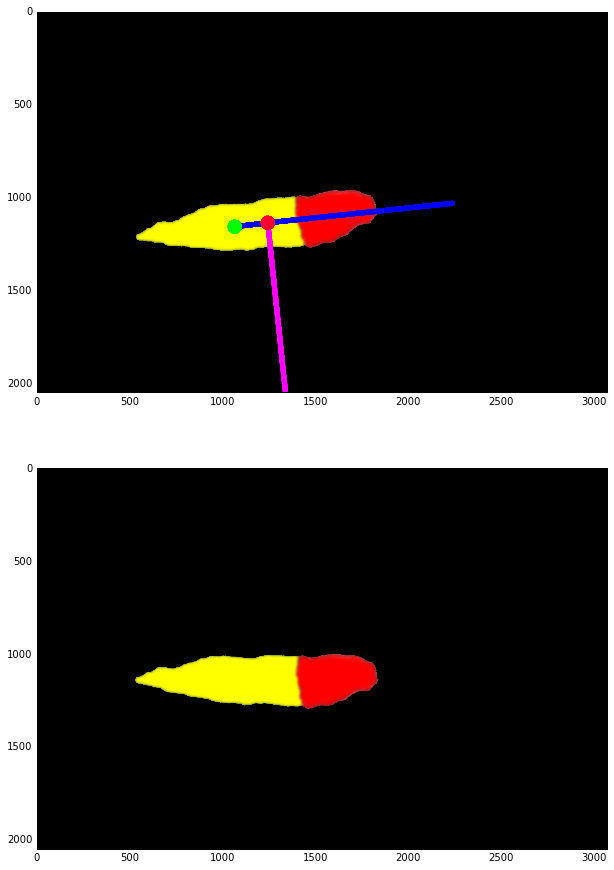

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by -24.32 about (1585, 841)


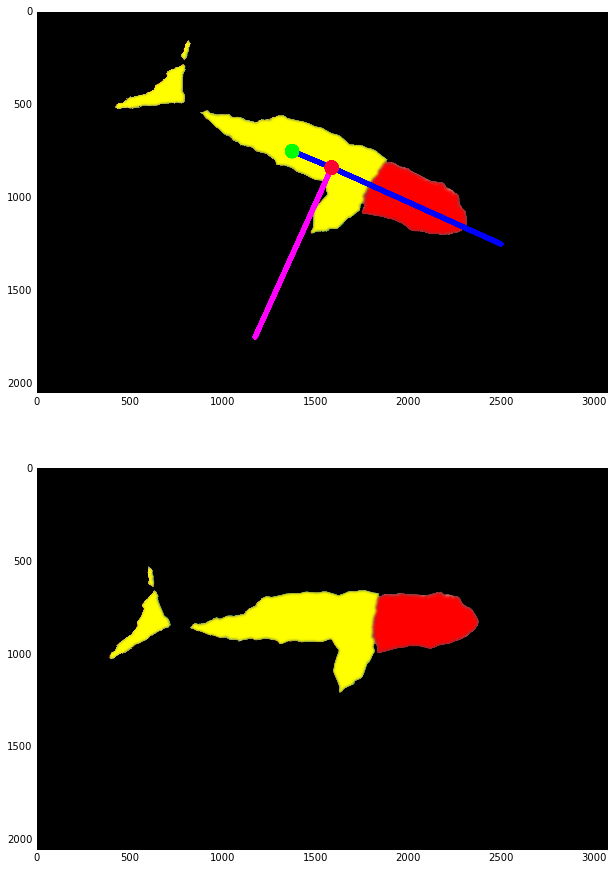

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by -92.53 about (1289, 1007)


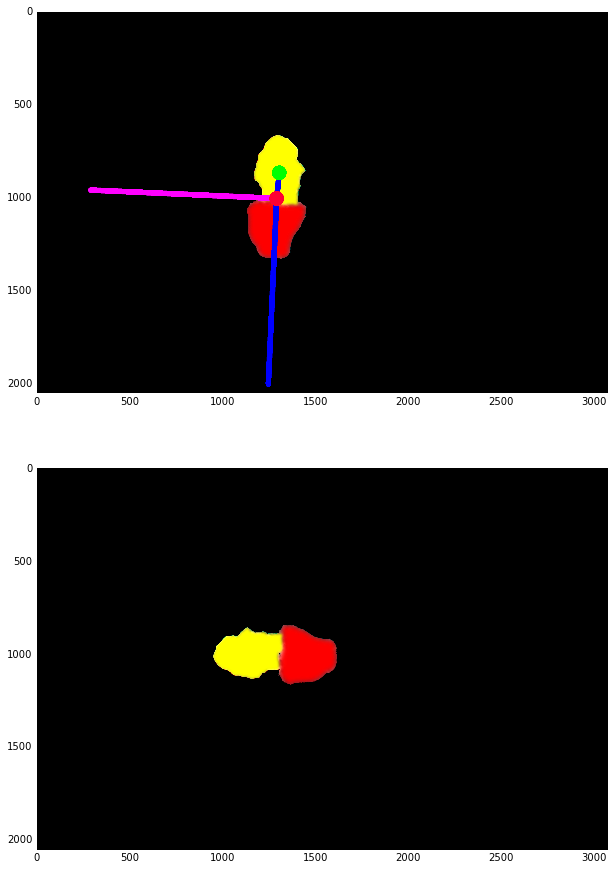

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 30.28 about (2109, 1839)


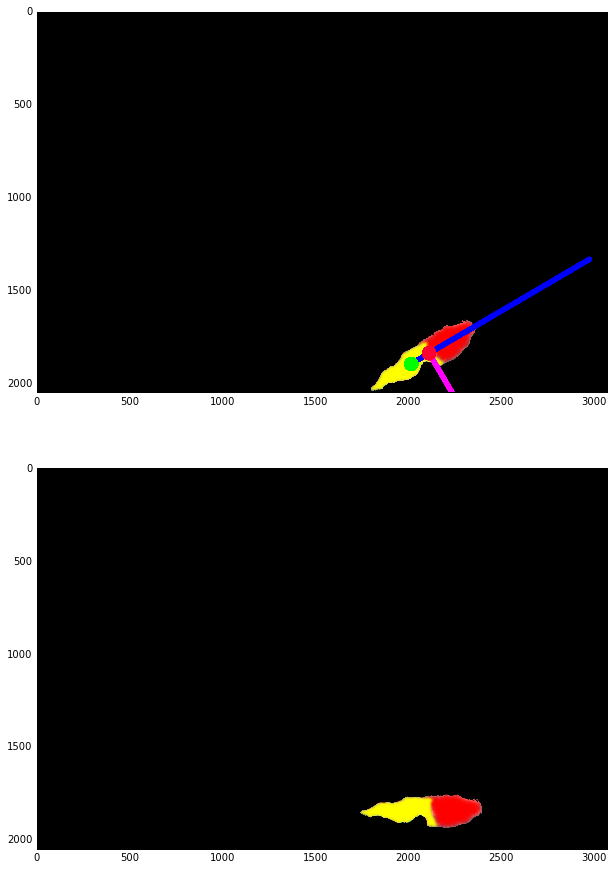

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 130.65 about (1296, 1441)


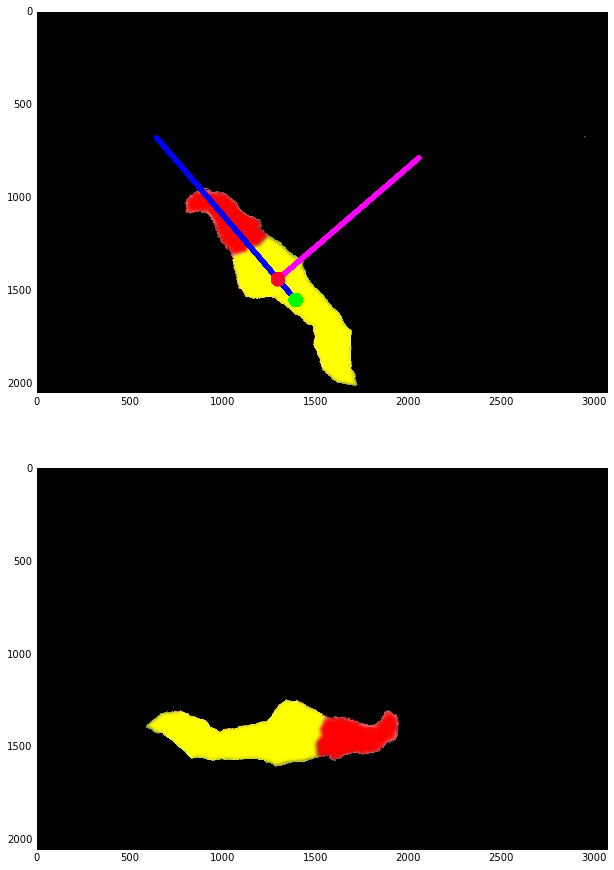

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 8.12 about (851, 1275)


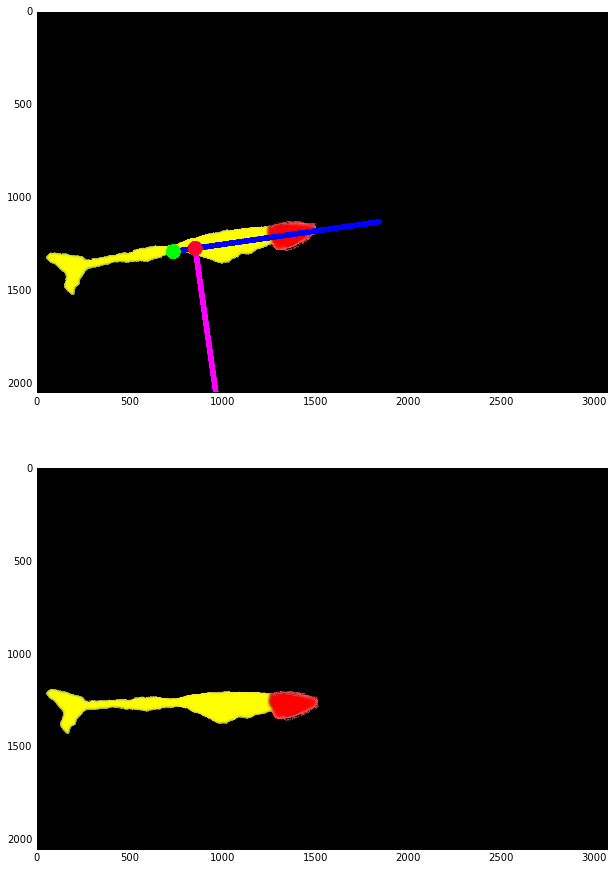

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by -50.44 about (1560, 951)


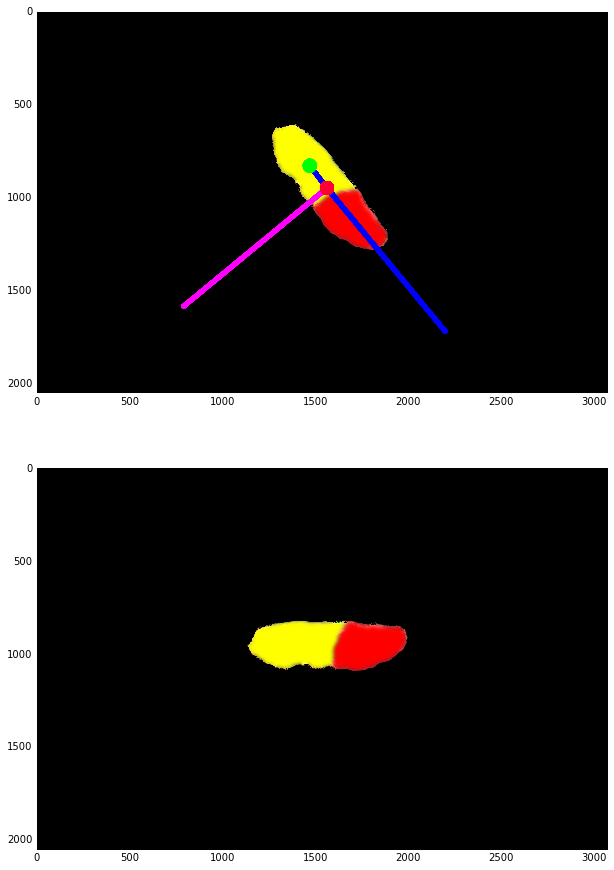

h/w/c = (2048, 3072, 3)
h/w/c = (2048, 3072, 3)
To be rotated by 95.90 about (1636, 1119)


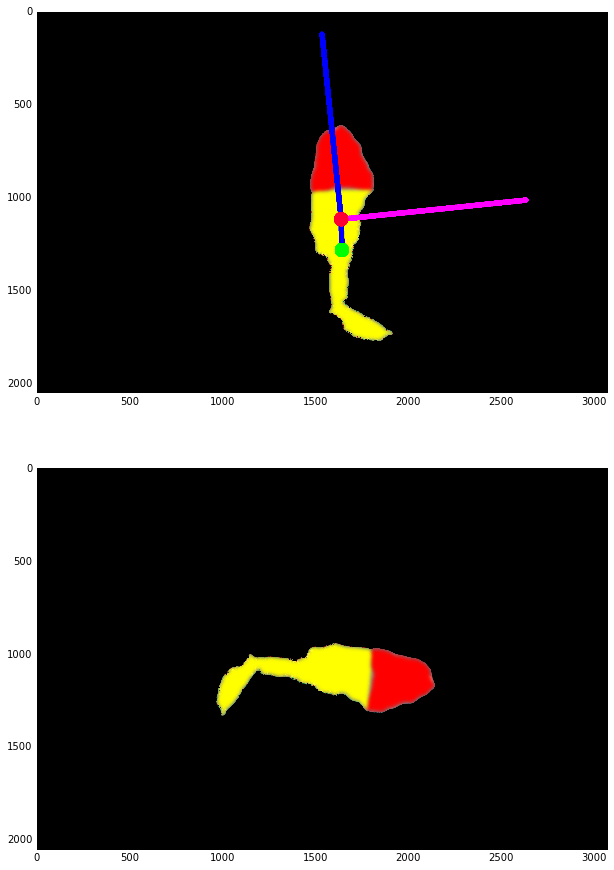

In [203]:
imgPaths = glob.glob("/home/msmith/kaggle/whale/imgs/*/l_*")
for i in np.random.permutation(len(imgPaths))[:15]:

    imPath = imgPaths[i]

    orig = cv2.imread(imPath.replace("l_","w1_"))[:,:,::-1]
    mask = cv2.imread(imPath)[:,:,::-1]
    h,w,c = mask.shape
    channel = 0 #Red
    
    # Call fns
    mask = getRedYellow(mask)
    centroidR, covR = getImgMoments(mask,0)
    centroidG, covG = getImgMoments(mask,1)
    e1,e2 = evs = getEigenVectors(centroid1=centroidG,centroid2=centroidR,cov=covR)
    rotMatrix = getRotationMatrix(evs=evs,centroid=centroidR,scale=1.0)
    rot = mask.copy()
    dst =cv2.warpAffine(rot, rotMatrix,(w,h),borderValue=0)
    
    # For display 
    arroLen = 1000
    arrowToE1 = tuple((centroidR + (e1)*arroLen).astype(np.uint16))
    arrowToE2 = tuple((centroidR + (e2)*arroLen).astype(np.uint16))
    centroidRT = totuple(centroidR)
    centroidGT = totuple(centroidG)
    
    dis = mask.copy()
    cv2.line(dis,centroidRT,arrowToE1,(0,0,255),30)
    cv2.line(dis,centroidRT,arrowToE2,(255,0,255),30)
    cv2.line(dis,centroidGT,centroidRT,(0,0,255),30)
    cv2.circle(dis,centroidRT,40,(255,0,50),-1,lineType=8)
    cv2.circle(dis,centroidGT,40,(0,255,0),-1)
    plt.title(imPath)
    plt.subplot(211)
    plt.imshow(dis,cmap=cm.gray); 
    plt.subplot(212)
    plt.imshow(dst,cmap=cm.gray); 
    plt.show()